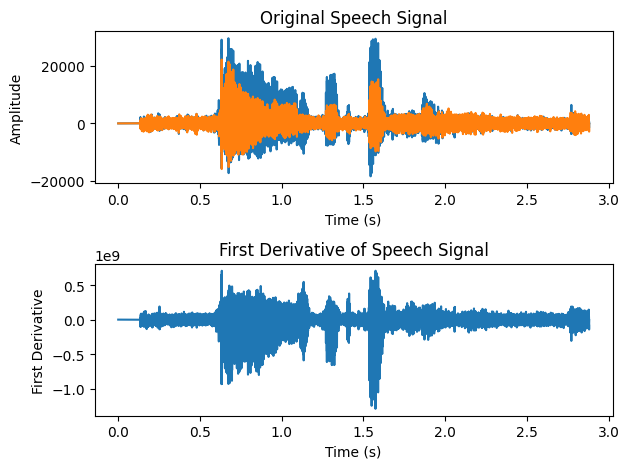

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

sampling_rate, signal = wavfile.read("/content/drive/MyDrive/speechproc.wav")

time_step = 1 / sampling_rate

first_derivative = np.diff(signal) / time_step

plt.subplot(2, 1, 1)
plt.plot(np.arange(len(signal)) / sampling_rate, signal)
plt.title('Original Speech Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(np.arange(len(first_derivative)) / sampling_rate, first_derivative)
plt.title('First Derivative of Speech Signal')
plt.xlabel('Time (s)')
plt.ylabel('First Derivative')

plt.tight_layout()
plt.show()
wavfile.write('first_derivative.mp3', sampling_rate, first_derivative.astype(np.int16))



In [ ]:
import numpy as np

def find_zero_crossings(signal):
    crossings = []
    for i in range(1, len(signal)):
        if (signal[i-1] > 0 and signal[i] < 0) or (signal[i-1] < 0 and signal[i] > 0):
            crossings.append(i)
    return crossings

first_derivative_signal = np.array([1, -2, 3, -4, 5, -6, 7, -8, 9, -10])

zero_crossings = find_zero_crossings(first_derivative_signal)

lengths_between_crossings = np.diff(zero_crossings)

threshold = 10
speech_lengths = [length for length in lengths_between_crossings if length > threshold]
silence_lengths = [length for length in lengths_between_crossings if length <= threshold]

average_speech_length = np.mean(speech_lengths)
average_silence_length = np.mean(silence_lengths)

print("Average length between consecutive zero crossings in speech regions:", average_speech_length)
print("Average length between consecutive zero crossings in silence regions:", average_silence_length)


Average length between consecutive zero crossings in speech regions: nan
Average length between consecutive zero crossings in silence regions: 1.0


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
!pip install sounddevice
